In [1]:
!pip install opencv-python-headless


In [2]:
!wget https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml


--2024-06-08 04:46:18--  https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml [following]
--2024-06-08 04:46:18--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.01s   

2024

In [7]:
from google.colab import files

# Upload the image for face detection
uploaded = files.upload()
image_path = list(uploaded.keys())[0]


Saving images.jpg to images (1).jpg


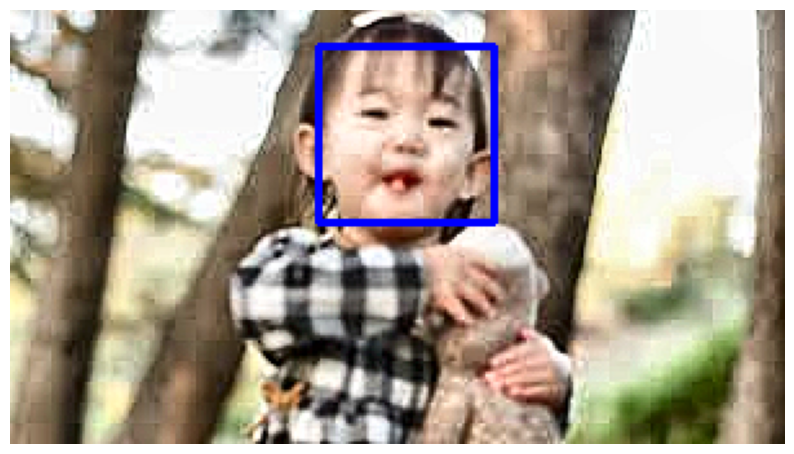

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the Haar Cascade file
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Read the uploaded image
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform face detection
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Enhance the image quality
def enhance_image(image):
    # Convert to LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Split LAB channels
    l, a, b = cv2.split(lab)

    # Apply CLAHE to L-channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)

    # Merge the CLAHE enhanced L-channel back with A and B channels
    limg = cv2.merge((cl, a, b))

    # Convert back to BGR color space
    enhanced_image = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

    return enhanced_image

# Correct blurriness using Unsharp Masking
def unsharp_mask(image, kernel_size=(5, 5), sigma=1.0, amount=1.0, threshold=0):
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)

    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)

    return sharpened

# Apply image enhancement and unsharp masking
enhanced_image = enhance_image(image)
deblurred_image = unsharp_mask(enhanced_image)

# Draw rectangles around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(deblurred_image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Convert image to RGB (from BGR) for displaying with matplotlib
rgb_image = cv2.cvtColor(deblurred_image, cv2.COLOR_BGR2RGB)

# Display the image with detected faces
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image)
plt.axis('off')
plt.show()
